# markov disks box 

In [1]:
import random, os, pylab

output_dir = 'markov_disks_box_movie'

img = 0
if not os.path.exists(output_dir): os.makedirs(output_dir)
def snapshot(pos, colors):
    global img
    pylab.subplots_adjust(left=0.10, right=0.90, top=0.90, bottom=0.10)
    pylab.gcf().set_size_inches(6, 6)
    pylab.axis([0, 1, 0, 1])
    pylab.setp(pylab.gca(), xticks=[0, 1], yticks=[0, 1])
    for (x, y), c in zip(pos, colors):
        circle = pylab.Circle((x, y), radius=sigma, fc=c)
        pylab.gca().add_patch(circle)
    
    pylab.savefig(os.path.join(output_dir, '%d.png' % img), transparent=True)
    pylab.close()
    
    img += 1

L = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
sigma = 0.15
sigma_sq = sigma ** 2
delta = 0.1
colors = ['r', 'b', 'g', 'orange']
n_steps = 50
for step in range(n_steps):
    snapshot(L, colors)
    
    a = random.choice(L)
    b = [a[0] + random.uniform(-delta, delta), a[1] + random.uniform(-delta, delta)]
    min_dist = min((b[0] - c[0]) ** 2 + (b[1] - c[1]) ** 2 for c in L if c != a) 
    box_cond = min(b[0], b[1]) < sigma or max(b[0], b[1]) > 1.0 - sigma
    if not (box_cond or min_dist < 4.0 * sigma ** 2):
        a[:] = b


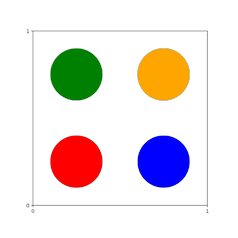

In [18]:
#how to make a movie

%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from pathlib import Path
from PIL import Image

current=Path()
dir_img = current / output_dir
picList = list(dir_img.glob('**/*.png'))
picList.sort()

fig = plt.figure()
def update(i):
    tmp = Image.open(picList[i])
    plt.clf()
    
    ax=plt.imshow(tmp, interpolation="spline36")
    
    plt.axis('off')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
anim = animation.FuncAnimation(fig,update, interval=200, repeat=False,frames=len(picList))  
#HTML(anim.to_jshtml())
HTML(anim.to_html5_video())

# direct disks box movie

In [10]:
print(fig)

Figure(432x288)
